Linear Regression - Overview
==================================
***

### How can I make predictions about real-world quantities, like sales or life expectancy?


Most often in real world applications we need to understand how one variable is determined by a number of others.

For example:

* How does sales volume change with changes in price. How is this affected by changes in the weather?

* How does the amount of a drug absorbed vary with dosage and with body weight of patient?  Does it depend on blood pressure?

* How are the conversions on an ecommerce website affected by two different page titles in an A/B comparison?

* How does the energy released by an earthquake vary with the depth of it's epicenter?

* How is the interest rate charged on a loan affected by credit history and by loan amount?

Answering questions like these, requires us to create a **model**.

A model is a formula where one variable (response) varies depending on one or more independent variables (covariates). For the loan example, interest rate might depend on FICO score, state, loan amount, and loan duration amongst others.

One of the simplest models we can create is a **Linear Model** where we start with the assumption that the dependent variable varies linearly with the independent variable(s).

While this may appear simplistic, many real world problems can be modeled usefully in this way.  Often data that don't appear to have a linear relationship can be transformed using simple mappings so that they do now show a linear relationship.  This is very powerful and Linear Models, therefore, have wide applicability.

They are one of the foundational tools of Data Science.

Creating a Linear Model involves a technique known as **Linear Regression**.  It's a tool you've most probably already used without knowing that's what it was called.

---



#### Linear Regression in the high school physics lab

Remember a typical physics lab experiment from high school? We had some input X (say force) which gave some output Y (say acceleration).  

You made a number of pairs of observations x, y and plotted them on graph paper.

<img src="https://github.com/LiveKlas/DataScience_Projects/blob/main/files/images/a1fig1_labexperiment.png?raw=1" />

Then you had to fit a straight line through the set of observations using a visual "best fit".  

<img src="https://github.com/LiveKlas/DataScience_Projects/blob/main/images/a1fig2_labexperiment_withline.png?raw=1" />

And then you read off 'm' the slope,  and 'b', the y-intercept from the graph, hoping it was close to the expected answer. By drawing the "best fit" line you were, in effect, visually estimating m and b without knowing it.  

You were doing informal Linear Regression. We're going to do this a little more formally. And then make it more sophisticated.

### Now for a bit of math

Let's start with the basics.

Remember the equation for a straight line from high school?

$$Y = mX + b$$

where $m$ is the slope and $b$ is the y-intercept.

Very briefly and simplistically, Linear Regression is a class of techniques for

**_Fitting a straight line to a set of data points_**.  

This could also be considered reverse engineering a formula from the data.

We'll develop this idea starting from first principles and adding mathematical sophistication as we go along. But before that, you're probably curious what were the 'm' and 'b' values for this graph.  We use modeling software to generate this for us and we get:

---


<img src="https://github.com/LiveKlas/DataScience_Projects/blob/main/images/a1fig3_labexperiment_slopeintercept.png?raw=1" />

---

We see two numbers, "Intercept" and "Slope".
Independent of what software we use to do our linear regression for us, it will report these two numbers in one form or another.
The "Intercept" here is the "b" in our equation.
And the "Slope" is the slope of Y with respect to the independent variable.


To summarize, we have a dataset (the observations) and a model (our guess for a formula that fits the data) and we have to figure out the parameters of the model (the coefficients m and b in our best fit line) so that the model fits the data the "best".
We want to use our data to find coefficients for a formula so that the formula will fit the data the "best".  


As we continue, we'll actually run the modeling software and generate these numbers from real data.  Here we just saw pictures of the results.

---

### Using the model for prediction

Once you had your visual best fit line and had read off the m and b you probably said something to the effect:

"The data follows a linear equation of the form Y = mX + b where m (slope)=(somenumber) and b (y intercept)=(someothernumber)"

You may recall that the equation is not an exact representation because most probably your data points are not all in a perfectly straight line. So there is some error varying from one data point to the next data point. Your visual approach subjectively tried to minimize some intuitive "total error" over all the data.  

What you did was intuitive "Linear Regression". You estimated m and b by the "looks right to me" algorithm.
We will start with this intuitive notion and rapidly bring some heavy machinery to bear that will allow us to solve pretty sophisticated problems.

At this point your lab exercise may well ask you to approximate what Y will be when X is some number outside the range of your measurements.
Then you use the equation above where m and b are now actual numbers say 2.1 and 0.3 respectively i.e the equation is Y = 2.1X + 0.3

This equation is your "model"

And you plug in an X to get a Y.  

This is where you are using your model to predict a value or, in other words, you are saying that I didn't use this value of X in my experiment and I don't have it in my data but I'd like to know what this value of X will map to on the Y axis.

Based on my model Y = 2.1X + 0.3 if I had used this value in my experiment then I believe I would have got an output Y of approximately what the straight line suggests.  

You also want to be able to say "my error is expected to be (some number), so I believe the actual value will lie between Y-error and Y+error".  

When used like this we call the X variable the "predictor" as values of Y are **predicted** based one values of X, and the Y variable the "response".

But before we do that let's take another trip back to the physics lab and peek over at the neighboring lab group's plots.
We might see a different plot.
So which one is "correct"?  



<img src="https://github.com/LiveKlas/DataScience_Projects/blob/main/files/images/a1fig4_twolabexperiments.png?raw=1" />

### A notion of total error


Visually we can see that our plot (the first one) is the "better" one. But why?
Because intuitively we feel that the line is closer to the points in the first one.
So let's try to understand formally why that might be correct. Or not.

Actually the graphs above were plotted by software that generated some points with random variation and then plotted a line through them.  

What the software did was compute a function called a "loss function", a measure of error. Then, it "tried out" multiple straight lines until it found one that minimized the "loss function" value for that choice -- then it read off the Intercept and X-slope for that line.  

Because this error estimation is an important part of our modeling we're going to take a more detailed look at it.



We want to create a simple formula for the error or difference between the value of Y given by our straight line, and the actual value of Y from our data set.  Unless our line happens to pass through a particular point, this error will be non-zero.  It may be positive or negative.  We take the square of this error (we can do other things like take the abs value, but here we take the square.....patience, all will be revealed) and then we add up such error terms for each data point to get the total error for this straight line and this data set.  

**Important**: for a different set of samples of the **very same** experiment we will get a different data set and possibly a different staright line and so almost certainly a different total error.

The squared error we used is a very commonly used form of the total error previously know as "quadratic error".   It also has the property that errors in the negative direction and positive direction are treated the same and this "quadratic error" or "square error" is always have a positive value.

So for now we will use the "squared error" as our representation of error. [1]

So Regression in general is any approach we might use to estimate the coefficients of a model using the data to estimate the coefficients by minimizing the "squared error".  Statistical software uses sophisticated numerical techniques using multivariable calculus to minimize this error and give us estimated values for the coefficients.


**Let's try this on some real data.**

We're going to look at a data set of Loan data from [Lending Club](http://www.lendingclub.com), a peer lending web site.
They have anonymized data on borrowers and loans that have been made. Loan data has many attributes and we'll explore the whole data set in a bit but for now we'll just look at how borrower FICO score affects interest rate charged.


Populating the interactive namespace from numpy and matplotlib


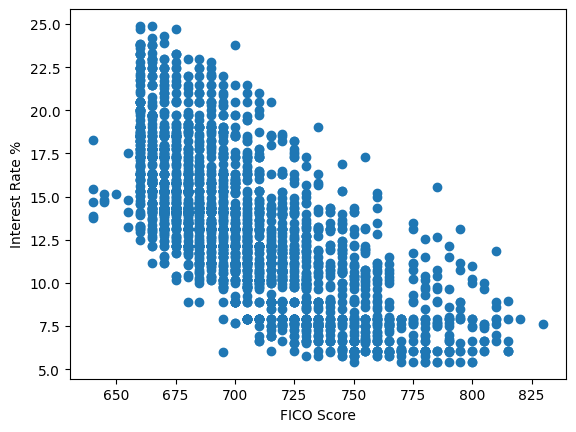

In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
# we have to clean up the raw data set which we will do
# in the next lesson. But for now let's look at the cleaned up data.
# import the cleaned up dataset into a pandas data frame
df = pd.read_csv('https://raw.githubusercontent.com/LiveKlas/DataScience_Projects/main/Data/loanf.csv')

# extract FICO Score and Interest Rate and plot them
# FICO Score on x-axis, Interest Rate on y-axis
intrate = df['Interest.Rate']
fico = df['FICO.Score']
p = plot(fico,intrate,'o')
ax = gca()
xt = ax.set_xlabel('FICO Score')
yt = ax.set_ylabel('Interest Rate %')


Here we see a distinct downward linear trend where Interest Rate goes down with increasing FICO score. But we also see that for the same FICO score there is a range of Interest rates.  This suggests that FICO by itself might not be enough to predict Interest Rate.

### Multivariate Linear Regression

So the natural question that arises is what happens if Y depends on more than one variable.
And this is where the power of mathematical generalization comes in.  The same principle applies but in multiple dimensions. Not just two or three but much larger numbers.  Twenty, thirty or even hundred independent variables are not out of question if we want to model real world data.  

But for now let's look at $Y$ as a function of two independent variables, $X_1$ and $X_2$, so

$$ Y = a_0 + a_1X_1 + a_2X_2 $$

Here $a_0$ is the Intercept term and $a_1, a_2$ are the coefficients of $X_1, X_2$, the independent variables respectively.   

So to look at a real data set with potentially multiple independent variables we're going to use the Lending Club data set in the next step.

---

## References

[1] Squared Error <http://en.wikipedia.org/wiki/Residual_sum_of_squares>

In [4]:
from IPython.core.display import HTML
import requests

def css_styling():
    url = "https://raw.githubusercontent.com/LiveKlas/DataScience_Projects/main/styles/custom.css"
    response = requests.get(url)  # Fetch content from the URL
    return HTML(response.text)  # Return the HTML content

css_styling()